In [2]:
r = './data/Shootout_2018_datasets.zip'
directory_to_extract_to = './data'

import zipfile
with zipfile.ZipFile(r, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

In [28]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


# In[275]:


for i in os.walk('./data/corrected2_20180719'):
    shoout_file_names=i[2]
#    and if file_name!='.DS_store'
    shoout_file_names=[(file_name) for file_name in shoout_file_names if file_name not in['Shootout_Rules_2018_final.docx', '.DS_Store']]
    shoout_file_names=sorted(shoout_file_names)
    break
print(shoout_file_names)

# ---
# 
# ##### •	Y_Nr: a unique number for each sample
# ##### •	C_Solute: type of solute i.e. Ace, Lac, NaCl, KCl, or pure water
# ##### •	Y_conSNr: the number of the consecutive scans taken the same sample replicate (1-3).
# ##### •	C_Experiment: order number in which experiments were executed. Each solute (4) measured on 3 different days gave a total of 3x4=12 experiments, labeled E1-E12.
# ##### •	Y_Molar_concentration_mM: molar concentration in millimoles.
# ##### •	Y_Mass_concentration_g100ml: mass concentration in grams per 100 ml of pure water. 
# ##### •	Y_Room_temperature: temperature of the room at the time of scanning. 
# ##### •	Y_Room_relHumidity: relative humidity of the room at the time of scanning. 
# 
# ---

# In[279]:





# In[319]:
os.mkdir('./data/shootout_2018_cleaned/')



def load_datasets(files=shoout_file_names):
    dataset_dict={}
    headers=['Y_Nr','C_Solute', 'Y_conSNr','C_Experiment', 'Y_Molar_concentration_mM','Y_Mass_concentration_g100ml','Y_Room_temperature','Y_Room_relHumidity']
    for (file) in files:
        
        ## Remove the .txt for dict
        file_key_name=(file[:-4])
        
        ## Tab delimited files
        full_dataset=pd.read_table(f'./data/corrected2_20180719/{file}')#, sep='\t', lineterminator='\r')
        full_dataset=full_dataset.dropna()

        if file_key_name[:10] == 'Validation':
            headers=['Y_Nr','Y_conSNr']
            
        experimental_data=full_dataset[headers]
        spectral_data=full_dataset[full_dataset.columns[len(headers):]]
        spectral_data.columns=[re.sub('w','',wave_l) for wave_l in spectral_data.columns]
        spectral_data.insert(0, 'Y_Nr', experimental_data['Y_Nr'])
        
        
        
        dataset_dict[file_key_name]={'EXPERIMENTAL':experimental_data,'SPECTRA':spectral_data}
                
    return(dataset_dict)


# In[320]:


data_sets=load_datasets()


# In[322]:

for set_name in data_sets:
   # print(d_s)
    for data_name in data_sets[set_name]:
       # print(d_ss)
        data_sets[set_name][data_name].to_csv(f'./data/shootout_2018_cleaned/{set_name}_{data_name}.csv', index=False)


['CalibrationC.txt', 'CalibrationEA.txt', 'CalibrationRaw.txt', 'TestC.txt', 'TestEA.txt', 'TestRaw.txt', 'ValidationC.txt', 'ValidationClassificationC.txt', 'ValidationClassificationEA.txt', 'ValidationClassificationRaw.txt', 'ValidationEA.txt', 'ValidationRaw.txt']


C:\Users\sz708872\AppData\Local\Temp/ipykernel_22196/270372839.py:114: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  wavelengths=[np.float(wavenum) for wavenum in dataset.columns]
C:\Users\sz708872\AppData\Local\Temp/ipykernel_22196/270372839.py:223: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classify_keras = KerasClassifier(build_fn = classification_model, epochs = 10,


INFO:tensorflow:Assets written to: ./class_tst_model\assets
Epoch 1/10
165/165 [==============================] - 3s 15ms/step - loss: 0.8444 - accuracy: 0.6451
Epoch 2/10
165/165 [==============================] - 2s 15ms/step - loss: 0.6652 - accuracy: 0.7277
Epoch 3/10
165/165 [==============================] - 3s 15ms/step - loss: 0.5741 - accuracy: 0.7659
Epoch 4/10
165/165 [==============================] - 3s 15ms/step - loss: 0.5281 - accuracy: 0.7859
Epoch 5/10
165/165 [==============================] - 3s 15ms/step - loss: 0.5095 - accuracy: 0.7959
Epoch 6/10
165/165 [==============================] - 3s 15ms/step - loss: 0.4983 - accuracy: 0.7980
Epoch 7/10
165/165 [==============================] - 3s 16ms/step - loss: 0.4912 - accuracy: 0.7990
Epoch 8/10
165/165 [==============================] - 3s 16ms/step - loss: 0.4780 - accuracy: 0.8028
Epoch 9/10
165/165 [==============================] - 3s 16ms/step - loss: 0.4464 - accuracy: 0.8201
Epoch 10/10
42/42 [============

C:\Users\sz708872\AppData\Local\Temp/ipykernel_22196/270372839.py:272: RuntimeWarning: invalid value encountered in sqrt
  SS_res =  np.sum(np.sqrt( y_true-y_pred ))
C:\Users\sz708872\AppData\Local\Temp/ipykernel_22196/270372839.py:273: RuntimeWarning: invalid value encountered in sqrt
  SS_tot = np.sum(np.sqrt( y_true - np.mean(y_true) ) )


R2....TRAIN:TEST
nan nan
RMSE....TRAIN:TEST
(0.12796338938031027, 0.1390802152226506)
HUBS....TRAIN:TEST
0.008012629615491915 0.009329505318924848


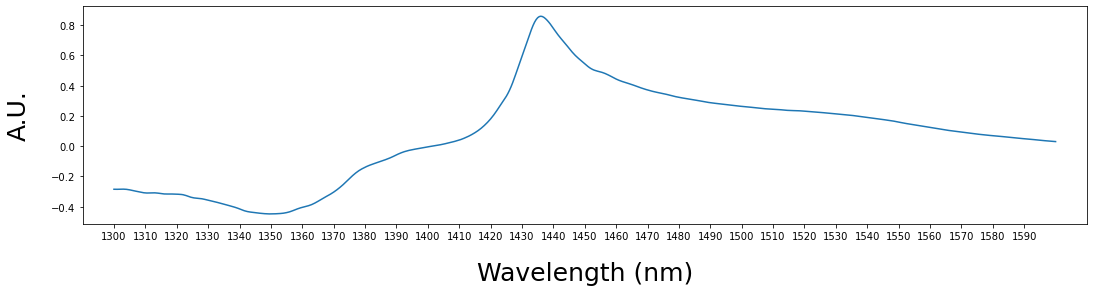

In [35]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, re
from keras.models import Sequential, load_model, save, Model
from matplotlib import gridspec

from keras.layers import Dense, Dropout, Flatten, MaxPooling1D, Conv1D, Reshape, GaussianNoise
from sklearn.model_selection import StratifiedKFold, cross_validate
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf


for i in os.walk('./data/shootout_2018_cleaned/'):
    new_data_sets=i[2]
#    and if file_name!='.DS_store'
    new_data_sets=[(file_name) for file_name in new_data_sets if file_name not in['Shootout_Rules_2018_final.docx', '~$ootout_Rules_2018_final.docx', '.DS_Store']]
    new_data_sets=sorted(new_data_sets)
    break
    
def GlobalStand(dataset):
    x_std=np.std(dataset)
    x_mean=np.mean(dataset)
    x_standard=(dataset-x_mean)/x_std
    dataset=x_standard
    return(dataset)

def load_dataset(dataset_name, standardize=True):
    out_data=pd.read_csv(f'./data/shootout_2018_cleaned/{dataset_name}')
    out_data=out_data.set_index(out_data['Y_Nr'])
    out_data=out_data.drop(columns='Y_Nr')
    if re.match('.*SPECTRA.csv$',dataset_name) and standardize:
        out_data=GlobalStand(out_data)
        
    return(out_data)

train_raw_spectra=load_dataset('CalibrationRaw_SPECTRA.csv')
train_raw_exper=load_dataset('CalibrationRaw_EXPERIMENTAL.csv')


test_raw_spectra=load_dataset('TestRaw_SPECTRA.csv')
test_raw_exper=load_dataset('TestRaw_EXPERIMENTAL.csv')


# ---
# DATASETS:
# <ul>
#     <li>'CalibrationC_EXPERIMENTAL.csv',</li>
# <li>'CalibrationC_SPECTRA.csv',</li>
# <li>'CalibrationEA_EXPERIMENTAL.csv',</li>
# <li>'CalibrationEA_SPECTRA.csv',</li>
# <li>'CalibrationRaw_EXPERIMENTAL.csv',</li>
# <li>'CalibrationRaw_SPECTRA.csv',</li>
# <li>'TestC_EXPERIMENTAL.csv',</li>
# <li>'TestC_SPECTRA.csv',</li>
# <li>'TestEA_EXPERIMENTAL.csv',</li>
# <li>'TestEA_SPECTRA.csv',</li>
# <li>'TestRaw_EXPERIMENTAL.csv',</li>
# <li>'TestRaw_SPECTRA.csv',</li>
# <li>'ValidationC_EXPERIMENTAL.csv',</li>
# <li>'ValidationC_SPECTRA.csv',</li>
# <li>'ValidationClassificationC_EXPERIMENTAL.csv',</li>
# <li>'ValidationClassificationC_SPECTRA.csv',</li>
# <li>'ValidationClassificationEA_EXPERIMENTAL.csv',</li>
# <li>'ValidationClassificationEA_SPECTRA.csv',</li>
# <li>'ValidationClassificationRaw_EXPERIMENTAL.csv',</li>
# <li>'ValidationClassificationRaw_SPECTRA.csv',</li>
# <li>'ValidationEA_EXPERIMENTAL.csv',</li>
# <li>'ValidationEA_SPECTRA.csv',</li>
# <li>'ValidationRaw_EXPERIMENTAL.csv',</li>
# <li>'ValidationRaw_SPECTRA.csv'</li>
# </ul>
# 
# ---

# ## EXPERIMENTAL DATA KEYS
# ---
# 
# ##### •	Y_Nr: a unique number for each sample
# ##### •	C_Solute: type of solute i.e. Ace, Lac, NaCl, KCl, or pure water
# ##### •	Y_conSNr: the number of the consecutive scans taken the same sample replicate (1-3).
# ##### •	C_Experiment: order number in which experiments were executed. Each solute (4) measured on 3 different days gave a total of 3x4=12 experiments, labeled E1-E12.
# ##### •	Y_Molar_concentration_mM: molar concentration in millimoles.
# ##### •	Y_Mass_concentration_g100ml: mass concentration in grams per 100 ml of pure water. 
# ##### •	Y_Room_temperature: temperature of the room at the time of scanning. 
# ##### •	Y_Room_relHumidity: relative humidity of the room at the time of scanning. 
# 
# ---



def plot_spectrum(dataset, sample_Nr=0, units='A.U.'):
    wavelengths=[np.float(wavenum) for wavenum in dataset.columns]

    values=dataset.iloc[sample_Nr].values
    label=f'Sample #:{sample_Nr} Spectrum'
    _=plt.figure(figsize=(18,4))
    _=plt.plot(wavelengths, values)
    _=plt.xticks(ticks=np.arange(min(wavelengths), max(wavelengths), step=10))
    _=plt.xlim(min(wavelengths)-10, max(wavelengths)+10)
    _=plt.xlabel('Wavelength (nm)', fontsize=25, labelpad=20)
    _=plt.ylabel(units, fontsize=25,labelpad=20)


def one_hot(y_in):
    solute_key = {'PW': 0, 'Ace': 1, 'Lac': 2, 'NaCl': 3, 'KCl': 4}
    y_in = [solute_key[y] for y in y_in]

    return (y_in)

def data_augment(x, betashift=0.05, slopeshift=0.05, multishift=0.05):
    # Shift of baseline
    # calculate arrays
    beta = np.random.random(size=(x.shape[0], 1)) * 2 * betashift - betashift
    slope = np.random.random(size=(x.shape[0], 1)) * 2 * slopeshift - slopeshift + 1
    # Calculate relative position
    axis = np.array(range(x.shape[1])) / float(x.shape[1])
    # Calculate offset to be added
    offset = slope * (axis) + beta - axis - slope / 2. + 0.5

    # Multiplicative
    multi = np.random.random(size=(x.shape[0], 1)) * 2 * multishift - multishift + 1

    x = multi * x + offset
    return(x)
def model_in_data(train_spec_data, train_exp_data, test_spec_data, test_exp_data, one_hot_y=True, data_aug_repeat=10,
                  data_aug=True):
    train_spec_data, train_exper_data = train_spec_data, train_exp_data
    test_spec_data, test_exper_data = test_spec_data, test_exp_data

    if one_hot_y:
        x_train, y_train = train_spec_data, one_hot(train_exper_data['C_Solute'])
        x_test, y_test = test_spec_data, one_hot(test_exper_data['C_Solute'])
    elif not one_hot_y:
        x_train, y_train = train_spec_data, np.array(GlobalStand(train_exper_data['Y_Mass_concentration_g100ml']))
        x_test, y_test = test_spec_data, np.array(GlobalStand(test_exper_data['Y_Mass_concentration_g100ml']))
    # In[9]:
    if data_aug:
        shift = np.std(np.array(x_train)) * 0.1
        X_train_aug = np.repeat(np.array(x_train), repeats=data_aug_repeat, axis=0)
        x_train = data_augment(X_train_aug, betashift=shift, slopeshift=0.05, multishift=shift)
        y_train = np.repeat(y_train, repeats=data_aug_repeat, axis=0)  # y_train is simply repeated

    return(x_train, y_train, x_test, y_test)



plot_spectrum(train_raw_spectra)


reg_train_X, reg_train_Y, reg_test_x, reg_test_y = model_in_data(train_raw_spectra, train_raw_exper, test_raw_spectra, test_raw_exper, one_hot_y=False)

kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

# fit and evaluate a model
def classification_model(trainX=None, trainy=None, testX=None, testy=None, verbose=1, epochs=10,
                   batch_size=32):
    n_features, n_outputs = 601, 5
    model = Sequential()
    model.add(GaussianNoise(0.05, input_shape=(n_features,)))
    model.add(Reshape((n_features, 1) ))
    
    model.add(Conv1D(filters=8, kernel_size=32, activation='relu', input_shape=(n_features,1)))
    model.add(Conv1D(filters=16, kernel_size=32, activation='relu'))
    
    model.add(Dropout(0.5))
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.save('./class_tst_model')

    return model

class_train_X, class_train_Y, class_test_x, class_test_y = model_in_data(train_raw_spectra, train_raw_exper, 
                                                                         test_raw_spectra, test_raw_exper, one_hot_y=True)

train_X=np.concatenate((class_train_X, np.array(class_test_x)))
train_Y=np.concatenate((class_train_Y, np.array(class_test_y)))

kfold= StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)
classify_keras = KerasClassifier(build_fn = classification_model, epochs = 10,
                                 batch_size = 32, verbose=1)

scores = cross_validate(classify_keras, train_X, train_Y, cv = kfold)
print(np.mean(scores['test_score'])*100, np.std(scores['test_score'])*100)



def regression_model(trainX=None, trainy=None, testX=None, testy=None, verbose=1, epochs=10,
                   batch_size=16):
    n_timesteps, n_features, n_outputs = 1, 601, 1
    model = Sequential()
    model.add(GaussianNoise(0.05, input_shape=(n_features,)))
    # First two is number of filter + kernel size
    model.add(Reshape((n_features, 1)))
    model.add(Conv1D(filters=8, kernel_size=32, activation='relu', input_shape=(n_features, 1)))
    model.add(Conv1D(filters=16, kernel_size=32, activation='relu'))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(n_outputs, activation='linear'))
    model.compile(loss=tf.keras.losses.Huber(), optimizer='adam', metrics=['mae','mape'])
    # fit network
    model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
    test_eval = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
    
    model.save('./reg_tst_model')
    return  model, test_eval


reg_train_X, reg_train_Y, reg_test_x, reg_test_y = model_in_data(train_raw_spectra, train_raw_exper,
                                                                 test_raw_spectra, test_raw_exper, one_hot_y=False)

reg_model, acc = regression_model(reg_train_X, reg_train_Y, reg_test_x, reg_test_y, epochs=10,batch_size=32)



def coeff_determination(y_true, y_pred):
    SS_res =  np.sum(np.sqrt( y_true-y_pred ))
    SS_tot = np.sum(np.sqrt( y_true - np.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + np.finfo(float).eps) )

def huber(y_true, y_pred, delta=1.0):
    y_true = y_true.reshape(-1,1)
    y_pred = y_pred.reshape(-1,1)
    return np.mean(delta**2*( (1+((y_true-y_pred)/delta)**2)**0.5 -1))

def rmse(X_train,y_train,X_test, y_test, model):
    rmse = np.mean((y_train - model.predict(X_train).reshape(y_train.shape))**2)**0.5
    rmse_test = np.mean((y_test - model.predict(X_test).reshape(y_test.shape))**2)**0.5
    return((rmse, rmse_test))


trainset_predictions=reg_model.predict(reg_train_X)
testset_predictions=reg_model.predict(reg_test_x)

train_R_2=coeff_determination(reg_train_Y, trainset_predictions)
test_R_2=coeff_determination(reg_test_y, testset_predictions)

train_hub=huber(reg_train_Y, trainset_predictions)
test_hub=huber(reg_test_y, testset_predictions)

rmses=rmse(reg_train_X, reg_train_Y, reg_test_x, reg_test_y, reg_model)
print('R2....TRAIN:TEST')
print(train_R_2, test_R_2)
print('RMSE....TRAIN:TEST')
print(rmses)
print('HUBS....TRAIN:TEST')
print(train_hub, test_hub)

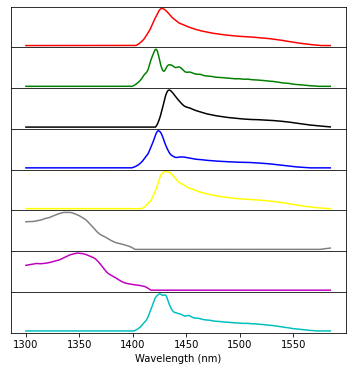

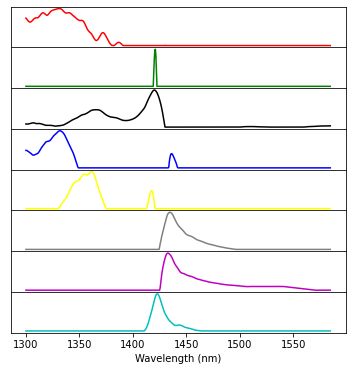

In [36]:
def f_map_visual(data, model_path):
   # x_train=data
    model=load_model(model_path)

    mod_f=Model(inputs=model.inputs, outputs=model.layers[2].output)
    feature_maps = mod_f.predict(np.array([class_train_X[0]]))#np.array([data.iloc[0]]))
    #f_maps=feature_maps[0].T
    # Simple data to display in various forms
    x = np.arange(1300, 1600-15, 0.5)

    fig = plt.figure(figsize=(6,6))
    # set height ratios for sublots
    gs = gridspec.GridSpec(8, 1)#, height_ratios=[2, 1]) 

    #F_0
    ax0 = plt.subplot(gs[0])
    line0, = ax0.plot(x, feature_maps[0].T[0], color='r')

    #F_1
    ax1 = plt.subplot(gs[1], sharex = ax0)
    line1, = ax1.plot(x, feature_maps[0].T[1], color='g')
    #plt.setp(ax0.get_xticklabels(), visible=False)

    #F_2
    ax2 = plt.subplot(gs[2], sharex = ax0)
    line1, = ax2.plot(x, feature_maps[0].T[2], color='black')
    #plt.setp(ax0.get_xticklabels(), visible=False)

    #F_3
    ax3 = plt.subplot(gs[3], sharex = ax0)
    line1, = ax3.plot(x, feature_maps[0].T[3], color='b')
    #plt.setp(ax0.get_xticklabels(), visible=False)

    #F_4
    ax4 = plt.subplot(gs[4], sharex = ax0)
    line1, = ax4.plot(x, feature_maps[0].T[4], color='yellow')
    #plt.setp(ax0.get_xticklabels(), visible=False)

    #F_5
    ax5 = plt.subplot(gs[5], sharex = ax0)
    line1, = ax5.plot(x, feature_maps[0].T[5], color='grey')
    #plt.setp(ax0.get_xticklabels(), visible=False)

    #F_6
    ax6 = plt.subplot(gs[6], sharex = ax0)
    line1, = ax6.plot(x, feature_maps[0].T[6], color='m')
    #plt.setp(ax0.get_xticklabels(), visible=False)

    #F_7
    ax7 = plt.subplot(gs[7], sharex = ax0)
    line1, = ax7.plot(x, feature_maps[0].T[7], color='c')
    #plt.setp(ax0.get_xticklabels(), visible=True)

    # remove last tick label for the second subplot
    #yticks = ax1.yaxis.get_major_ticks()
    #yticks= aget_xaxis().set_ticks([])
    for tic in [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7]:
        tic.get_yaxis().set_ticks([])
        #tic.label1.set_visible(False)

    # put lened on first subplot
    #ax0.legend((line0, line1), ('red line', 'blue line'), loc='lower left')

    # remove vertical gap between subplots
    plt.xlabel('Wavelength (nm)', fontsize=10)
    plt.subplots_adjust(hspace=.0)
   # plt.savefig('KERNAL_VISUAL')

f_map_visual(train_raw_spectra, './class_tst_model/')
f_map_visual(train_raw_spectra, './reg_tst_model/')